In [131]:
!pip install mysql-connector-python

Defaulting to user installation because normal site-packages is not writeable


In [132]:
!pip install pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


Nivel 1

Realiza la conexión en Python con MySQL Workbench para cargar toda la información que tienes en las tablas.

Realizarás una visualización para cada ejercicio. Comenta lo que llama la atención de graficar esta variable, justifica la elección del gráfico e interpreta los resultados en función de tus datos.


Conexión y carga de datos desde MySQL

In [231]:
import mysql.connector

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Patch

In [232]:
try:
    conexion = mysql.connector.connect(
        host='localhost',
        user='root',
        password='D4705.mySQL',
        database='sprint4')

    cursor = conexion.cursor()
    print("✅ Conexión exitosa a la base de datos.")

    # Función para cargar tablas
    def cargar_tabla(nombre_tabla):
        cursor.execute(f"SELECT * FROM {nombre_tabla}")
        return pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])

    # Cargar tablas
    df_company = cargar_tabla("company")
    df_user = cargar_tabla("user")
    df_credit_card = cargar_tabla("credit_card")
    df_card_status = cargar_tabla("card_status")
    df_product = cargar_tabla("product")
    df_transaction = cargar_tabla("transaction")
    df_transaction_product = cargar_tabla("transaction_product")

    cursor.close()
    conexion.close()

except mysql.connector.Error as err:
    print(f"❌ Error de conexión a la base de datos: {err}")


cursor.close()
conexion.close()

✅ Conexión exitosa a la base de datos.


Limpieza y transformación

In [233]:
cols_a_string = ["comp_id", "comp_name", "comp_country","comp_phone", "comp_email", "comp_website"]
df_company[cols_a_string] = df_company[cols_a_string].astype("string")

df_company.dtypes

comp_id         string[python]
comp_name       string[python]
comp_country    string[python]
comp_phone      string[python]
comp_email      string[python]
comp_website    string[python]
dtype: object

In [234]:
df_user["user_birth_date"] = pd.to_datetime(df_user["user_birth_date"], errors="coerce")

cols_a_string = ["user_name", "user_surname", "user_phone", "user_email","user_country", "user_city", "user_postal_code", "user_address"]
df_user[cols_a_string] = df_user[cols_a_string].astype("string")

df_user.dtypes

user_id                      int64
user_name           string[python]
user_surname        string[python]
user_phone          string[python]
user_email          string[python]
user_birth_date     datetime64[ns]
user_country        string[python]
user_city           string[python]
user_postal_code    string[python]
user_address        string[python]
dtype: object

In [235]:
df_credit_card["card_expiring_date"] = pd.to_datetime(df_credit_card["card_expiring_date"], errors="coerce")

cols_a_string = ["card_id", "card_iban", "card_pan","card_pin", "card_cvv", "card_track1", "card_track2"]
df_credit_card[cols_a_string] = df_credit_card[cols_a_string].astype("string")

df_credit_card.dtypes

card_id               string[python]
card_iban             string[python]
card_pan              string[python]
card_pin              string[python]
card_cvv              string[python]
card_track1           string[python]
card_track2           string[python]
card_expiring_date    datetime64[ns]
dtype: object

In [236]:
df_card_status["status"] = df_card_status["status"].astype("boolean")
df_card_status["card_id"] = df_card_status["card_id"].astype("string")

df_card_status.dtypes

card_id    string[python]
status            boolean
dtype: object

In [237]:
cols_a_string = ["prod_name", "prod_colour", "prod_warehouse_id"]
df_product[cols_a_string] = df_product[cols_a_string].astype("string")

df_product["prod_price"] = pd.to_numeric(df_product["prod_price"], errors="coerce").round(2)
df_product["prod_weight"] = pd.to_numeric(df_product["prod_weight"], errors="coerce").round(2)

df_product.dtypes

prod_id                       int64
prod_name            string[python]
prod_price                  float64
prod_colour          string[python]
prod_weight                 float64
prod_warehouse_id    string[python]
dtype: object

In [239]:
cols_id = ["tran_id", "card_id", "comp_id"]
df_transaction[cols_id] = df_transaction[cols_id].astype("string")

df_transaction["tran_timestamp"] = pd.to_datetime(df_transaction["tran_timestamp"], errors="coerce")
df_transaction["tran_amount"] = pd.to_numeric(df_transaction["tran_amount"], errors="coerce").round(2)
df_transaction["tran_decline"] = df_transaction["tran_decline"].astype("boolean")

df_transaction.dtypes

tran_id           string[python]
card_id           string[python]
comp_id           string[python]
user_id                    int64
tran_timestamp    datetime64[ns]
tran_amount              float64
tran_decline             boolean
tran_lat                 float64
tran_longitude           float64
dtype: object

In [240]:
df_transaction_product["tran_id"] = df_transaction_product["tran_id"].astype("string")

df_transaction_product.dtypes

tran_id    string[python]
prod_id             int64
dtype: object

Estilo general

In [456]:
# Paleta de colores
color_columna = "#2e5068"
color_columna_contraste = "#7a9bb0"
color_borde = "#0f2a3b"
color_fondo = "#f7f9fc"
color_leyenda_fondo = "#b0b6ba"

def aplicar_estilo(
    ax,
    fig=None,
    titulo="",
    xlabel="",
    ylabel="",
    grid_x=False,
    grid_y=False,
    intervalo_x=None,
    intervalo_y=None,
    ):
    if fig:
        fig.patch.set_facecolor(color_fondo)
    ax.set_facecolor(color_fondo)
    
    # Títulos y etiquetas
    ax.set_title(titulo,pad=20, color=color_borde)
    ax.set_xlabel(xlabel, color=color_borde)
    ax.set_ylabel(ylabel, color=color_borde)

    # Bordes y ticks
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_color(color_borde)
    ax.spines['left'].set_color(color_borde)    
    ax.tick_params(axis='x', colors=color_borde)
    ax.tick_params(axis='y', colors=color_borde)

    # Cuadrículas
    if grid_x:
        ax.xaxis.grid(True, linestyle='--', linewidth=0.5, color=color_borde, alpha=0.5)
    else:
        ax.grid(False, axis='x')
    if grid_y:
        ax.yaxis.grid(True, linestyle='--', linewidth=0.5, color=color_borde, alpha=0.5)
    else:
        ax.grid(False, axis='y')

    # Intervalos
    if intervalo_x:
        ax.xaxis.set_major_locator(MultipleLocator(intervalo_x))
    if intervalo_y:
        ax.yaxis.set_major_locator(MultipleLocator(intervalo_y))

    # Ajuste automático
    if fig:
        plt.tight_layout()

def configurar_leyenda(ax, titulo_leyenda):
    handles, labels = ax.get_legend_handles_labels()
    if not handles:
        return  # No hay datos para leyenda

    # Crear o actualizar leyenda con título y posición
    leg = ax.legend(
        handles=handles,
        labels=labels,
        title=titulo_leyenda,
        loc='upper left',
        bbox_to_anchor=(1.02, 1)
    )

    # Estilo visual
    leg.get_frame().set_facecolor(color_leyenda_fondo)
    leg.get_frame().set_edgecolor(color_borde)
    leg.get_frame().set_linewidth(1)

    for text in leg.get_texts():
        text.set_color(color_borde)

    if leg.get_title():
        leg.get_title().set_color(color_borde)

    # Refrescar canvas
    ax.figure.canvas.draw_idle()



- Ejercicio 1
Una variable numérica.

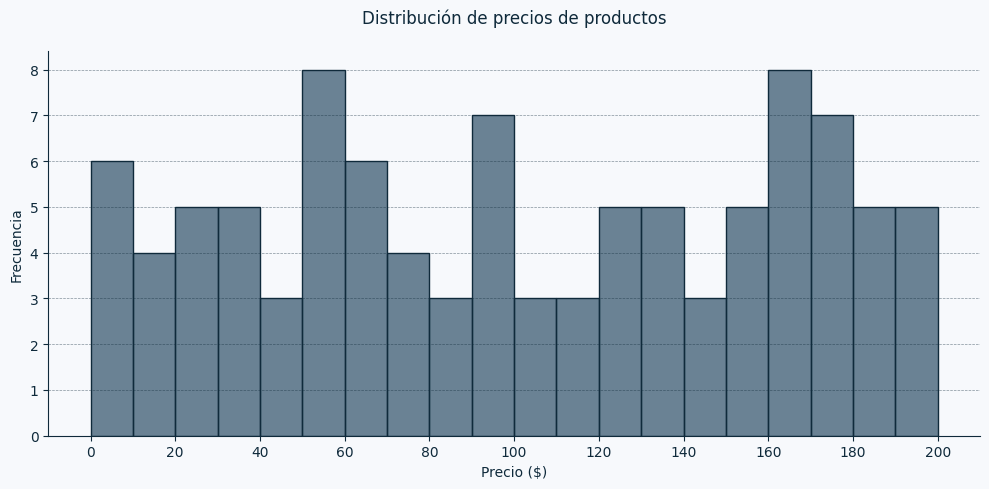

In [397]:
# Figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))

# Crear el histograma
sns.histplot(
    df_product["prod_price"],
    bins=20,
    binrange=(0, 200),
    color=color_columna,
    edgecolor=color_borde,
    alpha=0.7,
    ax=ax
)

# Estilo
aplicar_estilo(
    ax=ax,
    fig=fig,
    titulo="Distribución de precios de productos",
    xlabel="Precio ($)",
    ylabel="Frecuencia",
    intervalo_x=20,
    grid_y=True
)


- Variable graficada:

    - Precio de productos (prod_price)

- Justificación del gráfico:

    Se utilizó un histograma porque permite observar cómo se distribuyen los precios en intervalos definidos, mostrando la frecuencia de productos en cada rango. Esta visualización es útil para detectar concentraciones, dispersiones y posibles valores atípicos en el catálogo.

- Interpretación y análisis:

    La distribución de precios de los 100 productos, agrupada en 20 intervalos entre 0 y 200 dólares, refleja una oferta diversificada.

    Se identifican dos picos moderados entre 50–60 y 160–170 dólares, con 8 productos cada uno.

    Además, los rangos de 0–10 y 90–100 dólares muestran frecuencias destacadas, con 7 productos cada uno.

    Más de la mitad de los intervalos presentan una frecuencia estable, entre 4 y 6 productos, lo que sugiere una dispersión equilibrada a lo largo de toda la escala de precios.

    La frecuencia mínima es 3, presente en el 20% de los rangos. No se observan intervalos vacíos ni valores atípicos, lo que refleja una oferta estable y sin extremos pronunciados.

    Destaca una baja concentración en el rango ampliado de 100–120 dólares, con solo 6 productos, lo que evidencia una menor presencia en ese segmento.

    En contraste, el rango ampliado de 160–180 dólares concentra la mayor cantidad, con 15 productos, indicando el segmento más fuerte de la oferta.



- Ejercicio 2
Dos variables numéricas.

In [336]:
# Dataframe: Transacciones aprobadas
df_tran_ok = df_transaction[df_transaction["tran_decline"] == False]

# Dataframe: Transacciones aprobadas + Amount + Producto + Precio
df_tran_ok_prod = df_transaction_product.merge(df_tran_ok[["tran_id", "tran_amount"]], on="tran_id")
df_tran_ok_prod = df_tran_ok_prod.merge(df_product[["prod_id", "prod_price"]], on="prod_id")

df_tran_ok_prod.head()

,tran_id,prod_id,tran_amount,prod_price
0,02C6201E-D90A-1859-B4EE-88D2986D3B02,1,466.92,161.11
1,122DC333-E19F-D629-DCD8-9C54CF1EBB9A,1,172.01,161.11
2,1753A288-9FC1-52E6-5C39-A1FFB97B0D3A,1,497.84,161.11
3,1A6CECFB-2E3A-65A3-72D9-2FDB58A1E4BA,1,200.04,161.11
4,1EA2B262-D507-AD14-4374-4D532967113F,1,274.15,161.11


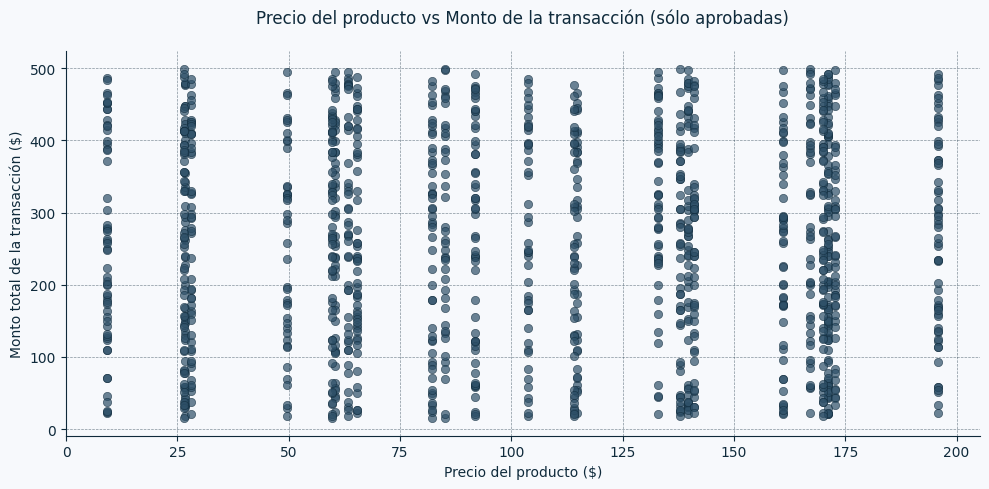

In [398]:
# Figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfico: Scatterplot
sns.scatterplot(
    data=df_tran_ok_prod,
    x="prod_price",
    y="tran_amount",
    color=color_columna,
    edgecolor=color_borde,
    alpha=0.7,
    ax=ax
)

# Estilo
aplicar_estilo(
    ax=ax,
    fig=fig,
    titulo="Precio del producto vs Monto de la transacción (sólo aprobadas)",
    xlabel="Precio del producto ($)",
    ylabel="Monto total de la transacción ($)",
    grid_x=True,
    grid_y=True
)


- Variable graficada:

    - precio del producto (prod_price) 
    - monto total de la transacción (tran_amount) en transacciones aprobadas
   
- Justificación del gráfico:

    Se utiliza un diagrama de dispersión (scatterplot) por ser ideal para analizar la relación entre dos variables numéricas continuas. Permite visualizar si existe una correspondencia proporcional entre el precio individual del producto y el monto pagado, así como detectar posibles anomalías o patrones inusuales.

- Interpretación y análsiis:

    El gráfico revela una alta dispersión y la ausencia de una tendencia clara entre el precio del producto y el monto total de la transacción.

    Hallazgo clave:
    Se identifican casos en los que productos con precios elevados (más de 100, 125, 150 e incluso 175 dólares) están vinculados a transacciones cuyo monto total es inferior al precio del propio producto, lo cual resulta incongruente.

    Si bien podría considerarse la hipótesis de descuentos aplicados (no reflejados en los datos disponibles), la magnitud y frecuencia del fenómeno no parecen justificarse únicamente por esta causa.

    Por tanto, esta anomalía probablemente se deba a:

    - Errores en los datos
    - Problemas de integridad relacional

    Este hallazgo resalta la necesidad de una revisión cuidadosa del modelado y la limpieza de datos, ya que compromete directamente la validez del análisis

- Ejercicio 3
Una variable categórica.


In [338]:
# Dataframe: Cantidad de compañias por pais
df_comp_x_pais = df_company['comp_country'].value_counts().reset_index()
df_comp_x_pais.columns = ['country', 'companies']
 
df_comp_x_pais

,country,companies
0,Sweden,11
1,Netherlands,10
2,United States,9
3,United Kingdom,9
4,Italy,9
5,Germany,8
6,Belgium,8
7,Norway,7
8,Australia,6
9,New Zealand,6


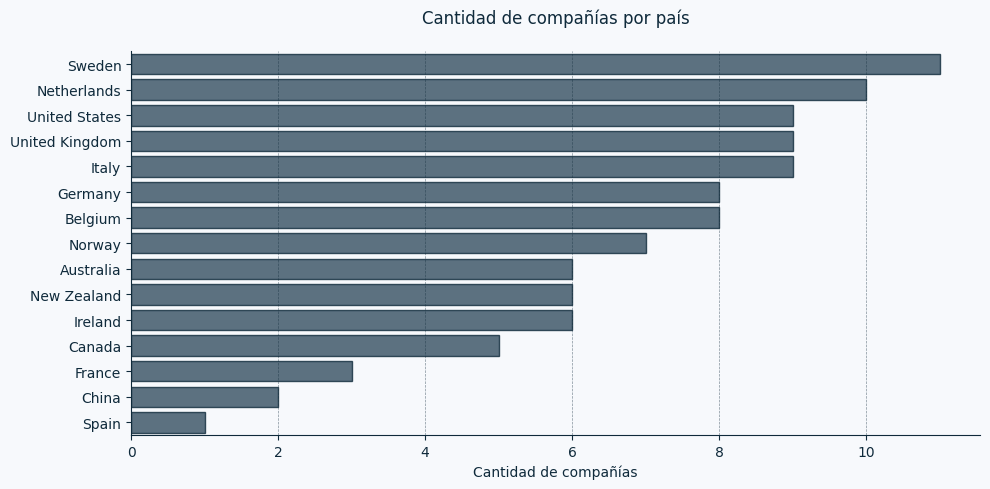

In [399]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))

# Gráfico: Barplot horizontal (barras horizontales)
sns.barplot(
    data=df_comp_x_pais,
    y='country',
    x='companies',
    color=color_columna,
    edgecolor=color_borde,
    alpha=0.8,
    ax=ax
)

# Estilo
aplicar_estilo(
    ax=ax,
    fig=fig,
    titulo="Cantidad de compañías por país",
    xlabel="Cantidad de compañías",
    ylabel="",
    grid_x=True
)


- Variable graficada:

    País (country)

- Justificación del gráfico:

    Se utilizó un gráfico de barras horizontales, una de las representaciones más utilizadas para variables categóricas. Mediante el mismo se puede visualizar con claridad la cantidad de compañías por país, facilitando la comparación directa entre las varias categorías (en este caso, 15 países).

- Interpretación:

    El gráfico muestra la distribución de 100 compañías entre 15 países.
    El país con menor presencia empresarial es España, con solo una compañía, mientras que Suecia (Sweden) encabeza la lista con 11.

    A partir de esta distribución, es posible clasificar a los países según su nivel de presencia empresarial:

    Baja (menos de 5 compañías): 3 países

    Media (entre 5 y 8 compañías): 7 países

    Alta (9 o más compañías): 5 países

    Sin embargo, esta información por sí sola ofrece un valor limitado. Para obtener un análisis más significativo, sería necesario complementarla con otras variables, como el volumen de transacciones o el monto total aportado por cada país.
    La cantidad de compañías no implica necesariamente una mayor actividad comercial o impacto económico, por lo que este hallazgo debe interpretarse con cautela dentro del contexto más amplio de los datos disponibles.

- Ejercicio 4
Una variable categórica y una numérica.

In [340]:
# Dataframe: Transacciones aceptadas + país de la compañía
df_tran_ok_pais = df_tran_ok.merge(df_company[['comp_id', 'comp_country']], on='comp_id')

# Dataframe: Amount total en transacciones por pais
df_monto_x_pais = df_tran_ok_pais.groupby('comp_country')['tran_amount'].sum().reset_index()
df_monto_x_pais = df_monto_x_pais.sort_values("tran_amount", ascending=False)

df_monto_x_pais

,comp_country,tran_amount
5,Germany,26888.55
13,United Kingdom,25274.38
12,Sweden,18813.45
6,Ireland,16006.22
10,Norway,15318.01
2,Canada,14930.69
14,United States,2587.78
8,Netherlands,2409.40
7,Italy,2190.08
1,Belgium,2041.74


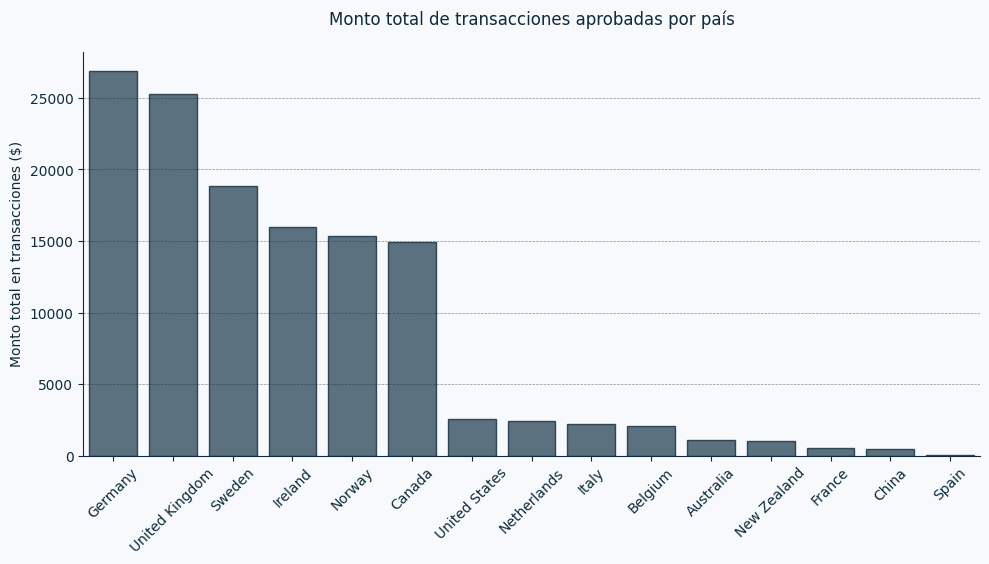

In [400]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 5))

# Graficar
sns.barplot(
    data=df_monto_x_pais, 
    x='comp_country', y='tran_amount', 
    color=color_columna, 
    edgecolor=color_borde, 
    alpha=0.8,
    ax=ax
)

# Estilo 
aplicar_estilo(
    ax=ax,
    fig=fig,
    titulo="Monto total de transacciones aprobadas por país",
    xlabel="",
    ylabel="Monto total en transacciones ($)",
    grid_y=True
)
ax.tick_params(axis='x', rotation=45, labelcolor=color_borde)

- Variable graficada:

    - País (comp_country) 
    - Monto total de transacciones aprobadas (tran_amount).

- Justificación del gráfico:

    Se utilizó un gráfico de barras para comparar montos totales entre países. Esta visualización permite identificar rápidamente qué países representan mayor volumen económico en transacciones aprobadas.

- Interpretación:

    En este análisis, examinamos el acumulado total en transacciones aprobadas agrupadas por país. Más allá de identificar dónde están las compañías, buscamos entender qué tan activas y relevantes son en términos económicos. 
    
    La visualización permite segmentar los países en tres grupos claros según su impacto económico:

    - Grupo bajo: 9 países acumulan menos de 5,000 dólares (cada uno), lo que sugiere una actividad limitada o menor tamaño de mercado.

    - Grupo medio: 4 países se encuentran entre los 15,000 y 20,000 dólares, mostrando una relevancia comercial más significativa.

    - Grupo alto: Solo 2 países superan los 25,000 dólares, consolidándose como los principales polos de aporte económico.


    Cantidad de empresas vs. impacto económico: lo que los datos revelan. 

    Casos destacados permiten profundizar en la relación entre número de compañías y volumen económico:

    - Alemania, país líder en monto, tiene tres empresas menos que Suecia, pero la supera ampliamente en volumen. Por su parte Suecia, aun encabezando la lista en cantidad de compañías, queda relegada al tercer puesto en monto total. Estos datos subrayan que más empresas no siempre se traduce en mayor aporte económico. 

    - Canadá representa un caso excepcional: con sólo cinco empresas supera los 15,000 dólares. En contraste, países como Australia, Nueva Zelanda, Bélgica, Italia o Estados Unidos —con más representación empresarial— aportan montos muy inferiores.

    - Irlanda, Australia y Nueva Zelanda tienen el mismo número de empresas y realidades operativas totalmente distintas: Irlanda es el cuarto país por monto total superando los 15,000 dólares; mientras que los otros 2 mencionados no superan los 5,000 dólares.

    - Bélgica y Alemania, con igual número de compañías, también divergen fuertemente: mientras Alemania lidera, Bélgica queda en el grupo con niveles más bajos de aporte.
    
    - Por su parte Italia, Reino Unido y EE.UU. tienen también igual cantidad de empresas, sin embargo: Reino Unido ocupa el segundo lugar en monto, mientras que los restantes pertenecen al grupo más bajo.

    Estos hallazgos evidencian que la cantidad de empresas no es un indicador suficiente para medir el impacto económico y a su vez, abren la puerta a futuros análisis segmentados: por industria, por tamaño de empresa o por estrategias comerciales, con el objetivo de comprender mejor el potencial de cada mercado.

- Ejercicio 5
Dos variables categóricas.


In [342]:
# Dataframe: Transacciones + país de la compañía
df_tran_pais = df_transaction.merge(df_company[["comp_id", "comp_country"]], on="comp_id")

df_tran_x_pais = df_tran_pais.groupby(["comp_country", "tran_decline"]).size().unstack(fill_value=0)

# Dataframe: Porcentaje de transacciones aprobadas y rechazadas por país
df_tran_x_pais_pct = df_tran_x_pais.div(df_tran_x_pais.sum(axis=1), axis=0) * 100
df_tran_x_pais_pct.columns = ["Aprobada", "Rechazada"]
df_tran_x_pais_pct = df_tran_x_pais_pct.sort_values("Aprobada", ascending=True)

df_tran_x_pais_pct


,Aprobada,Rechazada
comp_country,,
Australia,50.000000,50.000000
France,50.000000,50.000000
Spain,50.000000,50.000000
Italy,52.941176,47.058824
United States,52.941176,47.058824
New Zealand,54.545455,45.454545
Netherlands,55.555556,44.444444
Belgium,61.538462,38.461538
China,66.666667,33.333333


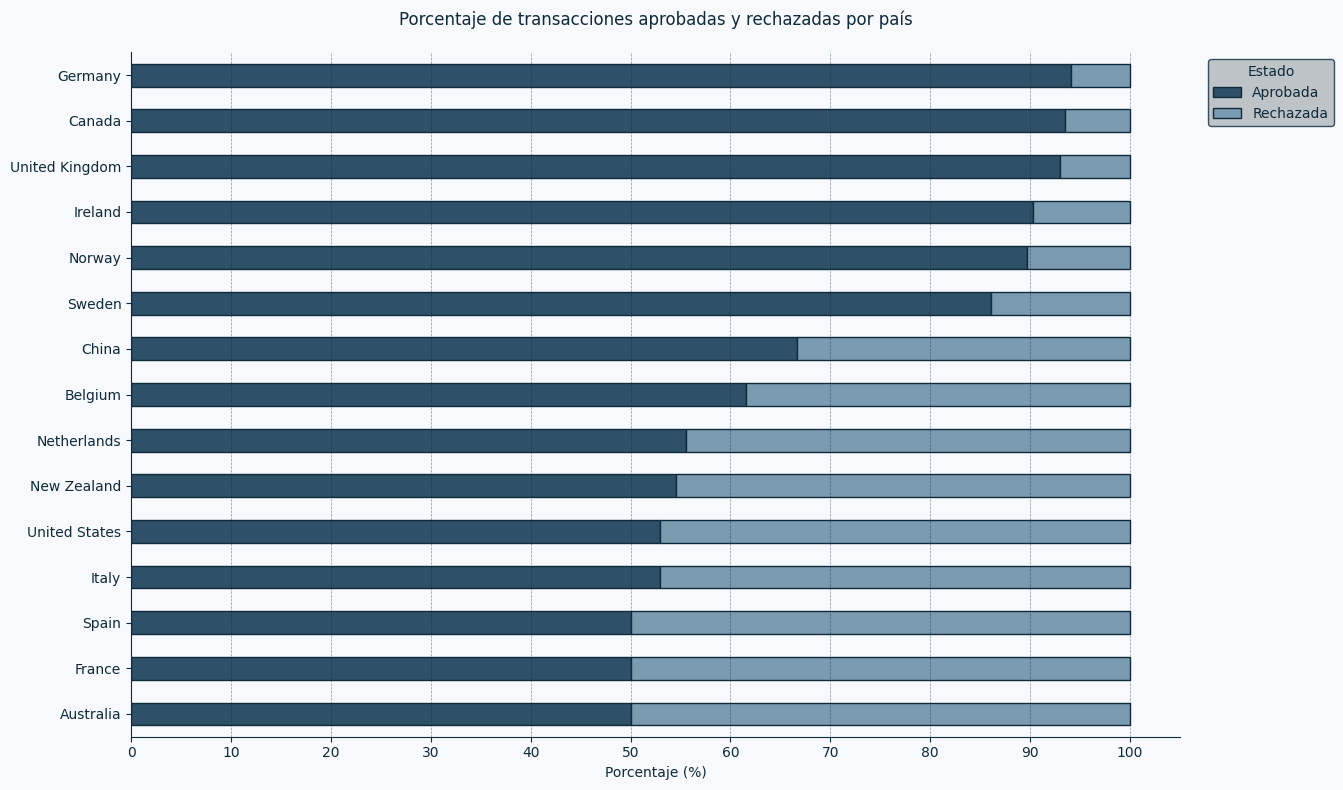

In [457]:
# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar barras horizontales apiladas
df_tran_x_pais_pct.plot(
    kind='barh',
    stacked=True,
    color=[color_columna, color_columna_contraste],
    edgecolor=color_borde,
    ax=ax
)

# Aplicar estilo
aplicar_estilo(
    ax=ax,
    fig=fig,
    titulo="Porcentaje de transacciones aprobadas y rechazadas por país",
    xlabel="Porcentaje (%)", 
    ylabel="",
    grid_x=True,
    intervalo_x=10,
)

configurar_leyenda(ax, titulo_leyenda="Estado")

- Variables graficadas:

    - País de la compañía (comp_country)

    - Estado de la transacción (tran_decline: Aprobada o Rechazada)

    - Valor representado: porcentaje (%) de transacciones por estado

- Justificación del gráfico:

    Se utilizó un gráfico de barras horizontales apiladas porque permite observar proporciones dentro de un total del 100%. Es especialmente útil en este caso para analizar la confiabilidad operativa de las compañías clientes por país, según la proporción de transacciones aprobadas y rechazadas.

- Interpretación:

    La gráfica muestra el porcentaje de transacciones aprobadas y rechazadas para compañías clientes agrupadas por país, permitiendo identificar de forma clara el grado de confiabilidad operativa. Se destacan varios hallazgos relevantes:

    - Alemania: liderazgo en volumen y confiabilidad
    Las compañías alemanas no solo aportan el mayor ingreso en transacciones aprobadas, sino que ademas obstentan la tasa más alta de aprobación de transacciones (94.1%), por lo cual se posiciona como un cliente estratégico, tanto por impacto económico como por eficiencia operativa .

    - Otros países con alta confiabilidad transaccional
    También se observan altos niveles de aprobación en compañías de Canadá (93.4%) y del Reino Unido (93.0%), lo cual indica integraciones sólidas y También se registran niveles elevados de aprobación en compañías de Canadá (93.4%) y del Reino Unido (93.0%), lo que sugiere procesos sólidos y una experiencia transaccional estable con la plataforma.

    - Casos de baja confiabilidad transaccional
    En contraste, paises como Australia, Francia y España tienen solo un 50% de aprobación, lo que implica que por cada transacción aprobada, hay una rechazada, balance que evidencia una baja confiabilidad transaccional.

    - Caso particular: España
    El caso de España es especialmente relevante, ya que además de estar es el país con el menor impacto económico y  Esto puede sugerir una baja penetración o una experiencia operativa deficiente que podría estar afectando el desempeño comercial.

    Aunque esta visualización ofrece un panorama útil sobre la confiabilidad transaccional por país, debe interpretarse con cautela. La baja confiabilidad observada en algunos países podría deberse a una o pocas compañías específicas con bajo rendimiento, y no necesariamente representa al conjunto de empresas del país. Por ello, se recomienda complementar este análisis con una revisión a nivel de compañía, especialmente en aquellos países con tasas de aprobación reducidas, con el fin de identificar el origen real de los problemas y orientar mejor las acciones correctivas.

- Ejercicio 6
Tres variables.

In [402]:
# Dataframe:  Estadísticas por país (cantidad de transacciones y monto promedio) 
df_stats_pais = df_tran_ok_pais.groupby('comp_country').agg({
    'tran_id': 'count',
    'tran_amount': 'mean'
}).reset_index()

df_stats_pais.columns = ['pais', 'cantidad_transacciones', 'monto_promedio']
df_stats_pais = df_stats_pais.sort_values("cantidad_transacciones", ascending=False)

df_stats_pais

,pais,cantidad_transacciones,monto_promedio
5,Germany,111,242.239189
13,United Kingdom,93,271.767527
12,Sweden,68,276.668382
10,Norway,61,251.114918
2,Canada,57,261.941930
6,Ireland,56,285.825357
8,Netherlands,10,240.940000
14,United States,9,287.531111
7,Italy,9,243.342222
1,Belgium,8,255.217500


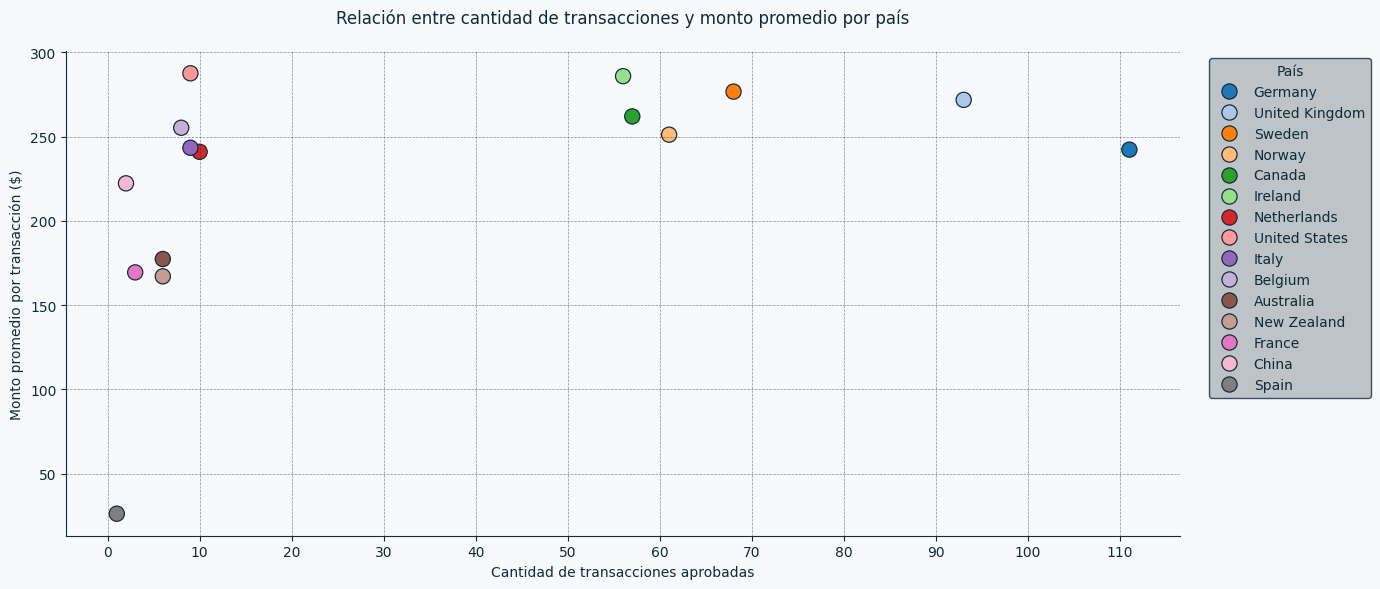

In [459]:
# Crear paleta para 15 países con 'tab20'
colores_por_pais = dict(zip(
    df_stats_pais['pais'],
    sns.color_palette("tab20", 15)
))

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de dispersión
sns.scatterplot(
    data=df_stats_pais,
    x='cantidad_transacciones',
    y='monto_promedio',
    hue='pais',
    palette=colores_por_pais,
    s=120,
    edgecolor=color_borde,
    ax=ax
)

aplicar_estilo(
    ax=ax,
    fig=fig,
    titulo="Relación entre cantidad de transacciones y monto promedio por país",
    xlabel="Cantidad de transacciones aprobadas",
    ylabel="Monto promedio por transacción ($)",
    grid_x=True,
    grid_y=True,
    intervalo_x=10,
)

configurar_leyenda(ax, titulo_leyenda="País")

- Variable graficada:

   - Cantidad de transacciones aprobadas por país (tran_id)

   - Monto por transacción (tran_amount)

   - País de la compañía (comp_country)

- Justificación del gráfico:

    Se eligió un gráfico de dispersión para visualizar la relación entre la cantidad de transacciones aprobadas y el monto promedio por transacción (USD) por país. El color identifica cada país, lo que facilita comparar su desempeño relativo en ambas dimensiones.

- Interpretación:

    - Alto volumen y buen valor promedio

        Alemania y Reino Unido se destacan por superar las 90 transacciones aprobadas con un monto promedio superior a $200, consolidándose como geografías estratégicas para la compañía. Ambos países lideran el resumen por monto total de transacciones aprobadas; al combinar esa información con el balance detectado entre el volumen y valor en las operaciones, se evidencian relaciones comerciales estables y altamente rentables, que aportan una base sólida para la estabilidad económica de la empresa.

    - Volumen medio con altos montos promedio

        Por su parte Irlanda, Noruega, Canadá y Suecia, concentran volumenes operacionales  mas discretos, que oscilan entre 50 y 70 transacciones aprobadas; pero con montos promedio superiores a $250. Con esta agrupación se detecta un perfil puede corresponder a compañías con relaciones comerciales selectivas pero económicamente relevantes.

    - Caso particular - Estados Unidos

        Estados Unidos se destaca como el país con el monto promedio por transacción más alto, sin embargo, acumula menos de 10 transacciones aprobadas. Esta combinación podría deberse a relaciones comerciales específicas con clientes de alto valor pero escasa frecuencia, o a un desarrollo comercial aún incipiente en el país. En cualquier caso, este comportamiento amerita un análisis más detallado por compañía, para evaluar si se trata de una oportunidad de crecimiento o de un nicho puntual ya consolidado.

    - Bajo volumen con montos promedios notables

        Italia, Bélgica, Países Bajos y China presentan un perfil caracterizado por un bajo volumen de transacciones aprobadas (menos de 10 operaciones en todos los casos), pero con montos promedios notables, que superan los $200. Este comportamiento sugiere relaciones comerciales esporádicas o aún en etapa de desarrollo, donde si bien la frecuencia es limitada, cada operación aporta un valor significativo. Se recomienda realizar un seguimiento puntual de estas geografías para evaluar su evolución y detectar oportunidades de consolidación o expansión.

    - Bajo volumen y monto promedio discreto

        Francia, Australia y Nueva Zelanda muestran un comportamiento de bajo volumen de transacciones aprobadas (entre 3 y 6 operaciones), junto con montos promedios discretos, situados entre los $150 y $200. Este perfil refleja relaciones comerciales débiles o poco desarrolladas, donde ni la frecuencia ni el valor económico alcanzan niveles significativos. Sería recomendable revisar el contexto operativo de estas compañías clientes, para determinar si existen limitaciones estructurales o si hay margen para fomentar un mayor dinamismo comercial.

    - Caso especial — España:

        España se encuentra en el extremo inferior, con solo 1 transacción aprobada y un monto muy bajo ($26 USD), lo que evidencia una penetración comercial limitada o posibles dificultades operativas que requieren un análisis más detallado.

- Ejercicio 7
Graficar un Pairplot.


In [504]:
# Dataframe: Transacciones aprobadas + país del usuario
df_tran_ok_user = df_tran_ok.merge(df_user[['user_id', 'user_country']], on='user_id')

# Dataframe: Cantidad de productos por transaccion
df_prod_x_tran = df_transaction_product.groupby('tran_id').size().reset_index(name='prod_count')

# Dataframe: Transacciones aprobadas + cantidad de productos por transaccion + país del usuario
df_prod_x_tran_ok_user = df_tran_ok_user.merge(df_prod_x_tran, on='tran_id')

# Dataframe: metricas por usuario (pais + ticket promedio + cantidad de transacciones)
df_user_metrics = df_prod_x_tran_ok_user.groupby(['user_id', 'user_country']).agg(
    ticket_promedio = ('tran_amount', 'mean'),
    cantidad_transacciones = ('tran_id', 'count')
).reset_index()

df_user_metrics = df_user_metrics.rename(columns={
    "user_country": "País de usuario",
    "ticket_promedio": "Ticket promedio",
    "cantidad_transacciones": "Cantidad de transacciones"
})

df_user_metrics.head()

,user_id,País de usuario,Ticket promedio,Cantidad de transacciones
0,60,United States,156.23,1
1,61,United States,460.82,1
2,62,United States,133.39,1
3,63,United States,82.43,1
4,64,United States,471.47,1


Text(0.5, 1.05, 'Perfil de usuarios por país')

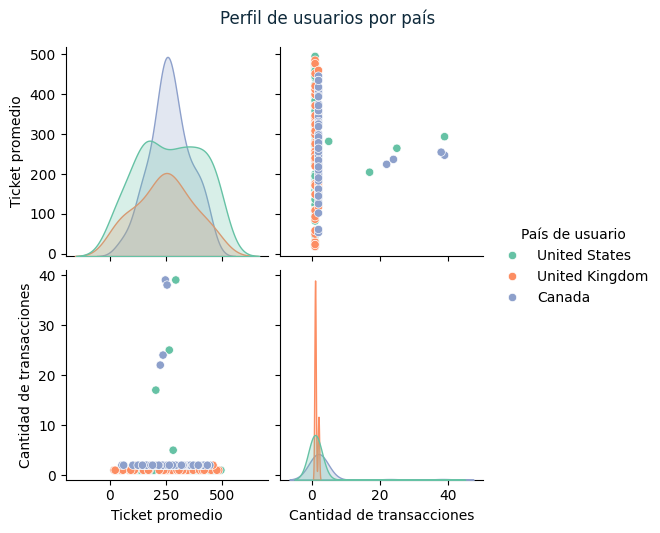

In [514]:
sns.pairplot(
    df_user_metrics, 
    vars=['Ticket promedio', 'Cantidad de transacciones'],
    hue='País de usuario',
    palette='Set2',
    diag_kind='kde'
)

plt.suptitle('Perfil de usuarios por país', y=1.05, color=color_borde)

- Variables graficadas

   - Cantidad de transacciones por usuario (cantidad_transacciones)

   - Ticket promedio por usuario (ticket_promedio)

   - País de origen del usuario (user_country)

- Justificación del gráfico

   El gráfico de pares (pairplot) permite explorar visualmente las relaciones bivariadas entre múltiples variables numéricas de forma simultánea. En este caso, se analizaron dos métricas clave del comportamiento transaccional (cantidad de transacciones y ticket promedio), esta vez a nivel de usuario, junto con su distribución por país (país de usuario). Esto facilita identificar patrones, correlaciones y diferencias entre grupos de usuarios según su país de origen, así como detectar valores atípicos o segmentos con comportamientos extremos.

- Interpretación 

   En lugar de analizar cada gráfico de forma aislada, se optó por realizar una lectura integral del gráfico de pares (pairplot) para identificar patrones comunes, segmentaciones claras y comportamientos relevantes. A partir de esta visualización, que cruza variables clave del comportamiento transaccional con la segmentación por país, se extraen los hallazgos más significativos que se detallan a continuación

   Perfiles de usuario: 

   - Usuarios de bajo compromiso

      - Se observa una alta concentración de usuarios con muy pocas transacciones (menos de 3), lo cual describe un comportamiento de compras esporádico o exploratorio
      
      - El ticket promedion es variable, con un limite superior que friza los $500.

      - Este grupo recoge una abrumadora mayoría del universo analizado, lo que indica una posible oportunidad de mejorar la retención.

   - Usuarios recurrentes

      - Un grupo muy reducido de usuarios destaca por tener registradas entre 10 y 40 transacciones.

      - Este patrón revela comportamiento atípico de alta frecuencia de compra, con un ticket promedio moderado de entre $200 y $300.
      
      - Es un grupo reducido pero con mucho impacto al concentrar el mayor volumen de gasto debido a la recurrencia de sus compras.


   Análisis por país de usuario

   - Reino Unido

      - Todos los usuarios se concentran en el grupo de bajo compromiso, sin excepción.
      
      - Sus tickets promedio son variados (desde $20 hasta casi $500), lo que puede indicar interés inicial pero una falta de retención.
      
      - Recomendación: explorar posibles barreras de fidelización específicas de este mercado.

   - Estados Unidos

      - Presencia en ambos segmentos de usuarios:

         Muchos usuarios con una sola compra y ticket variable, pero también varios usuarios recurrentes; dualidad que sugiere un mercado mixto, donde conviven tanto clientes de oportunidad como potenciales embajadores de marca.
   
   - Canadá

      - Representación en los dos grupos de usuarios

      - Tiene una marcada concentración de usuarios con 2 transacciones, lo que podría indicar fidelización en progreso.
      
      - También concentra mas del 50% de los usuarios recurrentes.
      
      - Parece ser un mercado fértil para estrategias de largo plazo y programas de lealtad.

   Conclusiones

   - El comportamiento transaccional muestra una base de usuarios dominada por compras únicas, pero con un núcleo rentable de clientes recurrentes.

   - Hay una ausencia de correlación directa entre frecuencia y ticket promedio.

   - El país de origen tiene un peso importante en el perfil transaccional del usuario:

      - Reino Unido requiere estrategias de retención.

      - Estados Unidos muestra oportunidades tanto en adquisición como en fidelización.

      - Canadá destaca como el país con mayor potencial de clientes fieles

Nivel 2
Ejercicio 1
Correlación de todas las variables numéricas.


In [348]:
# Dataframe: Transacciones aprobadas + Amount + Producto + Precio
df_numericas = df_tran_ok_prod.merge(df_product[["prod_id", "prod_weight"]], on="prod_id")
df_numericas = df_numericas.merge(df_transaction[["tran_id","tran_lat", "tran_longitude"]], on="tran_id")
df_numericas = df_numericas[["tran_amount", "prod_price", "prod_weight","tran_lat", "tran_longitude"]].copy()

df_numericas.head()


,tran_amount,prod_price,prod_weight,tran_lat,tran_longitude
0,466.92,161.11,1.0,81.9185,-12.5276
1,172.01,161.11,1.0,29.6372,-166.1730
2,497.84,161.11,1.0,57.9422,-114.7290
3,200.04,161.11,1.0,-55.9323,60.4475
4,274.15,161.11,1.0,-45.6340,175.5620


In [364]:
etiquetas_ajustadas = ["Monto", "Precio", "Peso", "Latitud", "Longitud"]

matriz = df_numericas.corr()
matriz.index = etiquetas_ajustadas
matriz.columns = etiquetas_ajustadas

matriz

,Monto,Precio,Peso,Latitud,Longitud
Monto,1.000000,0.003035,-0.022860,0.076377,0.043979
Precio,0.003035,1.000000,0.207495,-0.034291,0.028003
Peso,-0.022860,0.207495,1.000000,0.000897,-0.033316
Latitud,0.076377,-0.034291,0.000897,1.000000,-0.014723
Longitud,0.043979,0.028003,-0.033316,-0.014723,1.000000


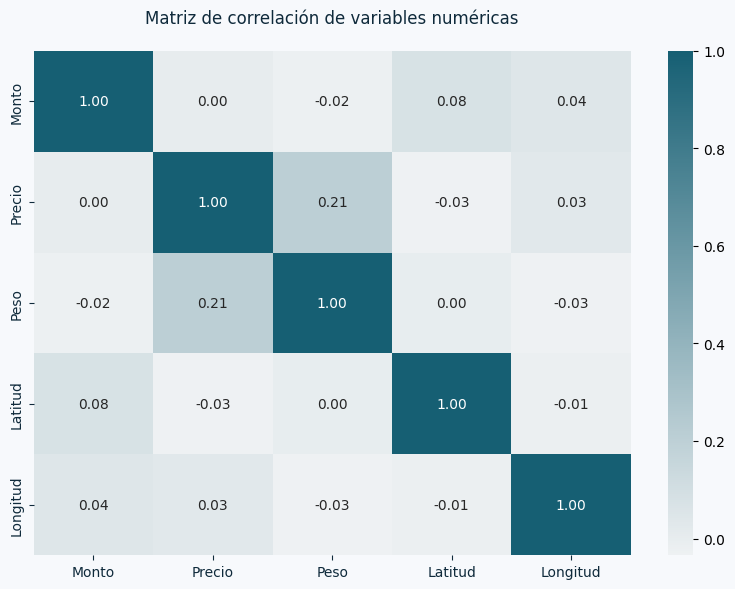

In [484]:
# Paleta de colores del heatmap
color_matriz = sns.light_palette("#165f73", as_cmap=True)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(8, 6))

# Graficar heatmap
sns.heatmap(matriz, annot=True, cmap=color_matriz, fmt=".2f", ax=ax)

# Aplicar estilo personalizado
aplicar_estilo(
    ax=ax,
    fig=fig,
    titulo="Matriz de correlación de variables numéricas",
)


- Variables analizadas (variables numéricas de los dataframes origen):

    - Monto de la transacción (tran_amount)

    - Precio del producto (prod_price)

    - Peso del producto (prod_weight)

    - Latitud de la transacción (tran_lat)

    - Longitud de la transacción (tran_longitude)

- Justificación del análisis:

    Se utilizó una matriz de correlación para examinar las relaciones lineales entre las variables numéricas relevantes de las transacciones y los productos asociados. Este análisis es fundamental para detectar patrones o dependencias claves para la toma de desiciones.

- Interpretación

    Hallazgos esperados

    - La matriz de correlación es simétrica porque la correlación entre los pares de variables escogidas también lo es.

    - Cada variable está perfectamente correlacionada consigo misma (valor 1 en la diagonal).

    Hallazgos encontrados

    - El monto de la transacción no muestra correlaciones significativas con el precio o peso del producto, indicando que el valor pagado en una transacción no depende directamente de estas características de los productos asociados.

    - Existe una correlación moderada y positiva que indica una débil tendencia a que productos de mayor peso tengan precios discretamente más altos.

    - Las coordenadas geográficas (latitud y longitud) presentan correlaciones muy bajas o cercanas a cero con las variables económicas, lo que sugiere que la ubicación no está asociada directamente con el monto, precio o peso en este conjunto de datos.


Ejercicio 2
Implementa un jointplot.


In [ ]:
df_producto = df_product[["prod_id", "prod_price", "prod_weight"]]
df_producto = df_producto.rename(columns={
    "prod_price": "Precio de producto",
    "prod_weight": "Peso de producto",
})

df_producto.head()

,prod_id,Precio de producto,Peso de producto
0,1,161.11,1.0
1,2,9.24,2.0
2,3,171.13,1.5
3,4,71.89,3.0
4,5,171.22,3.2


Text(0.5, 1.05, 'Relación entre precio de producto y peso de producto')

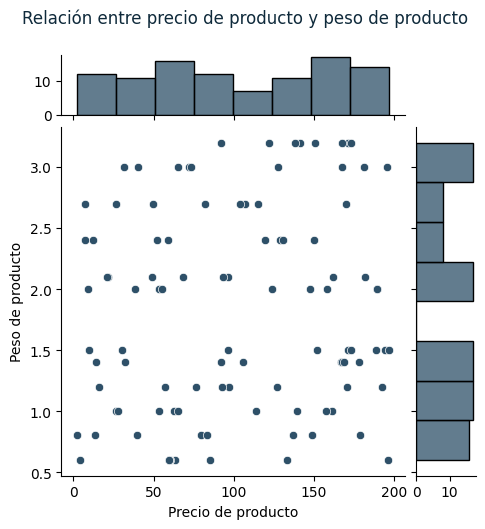

In [ ]:
sns.jointplot(
    data=df_producto,
    x='Precio de producto',
    y='Peso de producto',
    kind='scatter',
    height=5,
    marginal_ticks=True,
    color=color_columna
)

# Título
plt.suptitle("Relación entre precio de producto y peso de producto", y=1.05, color=color_borde)



- Variables graficadas
   - Precio del producto (Precio de producto)

   - Peso del producto (Peso de producto)

- Justificación del gráfico

    El diagrama de dispersión con distribuciones marginales (jointplot), es una herramienta comúnmente empleada para analizar la relación entre dos variables numéricas continuas. En este caso, permite observar visualmente cómo se relacionan el precio y el peso de los productos, al mismo tiempo que muestra la distribución individual de cada variable en los ejes correspondientes.

    Este tipo de visualización es útil para detectar patrones de concentración, posibles correlaciones, dispersiones atípicas y valores extremos (outliers), todo en un solo gráfico. Además, facilita una lectura integral del comportamiento conjunto y marginal de ambas variables, aportando contexto adicional que no sería visible en gráficos univariados.

- Interpretación

   - El precio de los productos muestra una alta dispersión, con valores entre $1 y $200.

   - El peso de los productos también es variado, mostrando una segmentación clara en dos grupos:
     
      - Productos con peso de hasta 1.5 kg.

      - Productos con peso igual o por encima de 2 kg.

   - No se evidencia una correlación lineal fuerte entre el peso del producto y su precio, lo que sugiere que el peso no es un determinante directo del precio.


Nivel 3
Ejercicio 1
Implementa un violinplot combinado con otro tipo de gráfico.

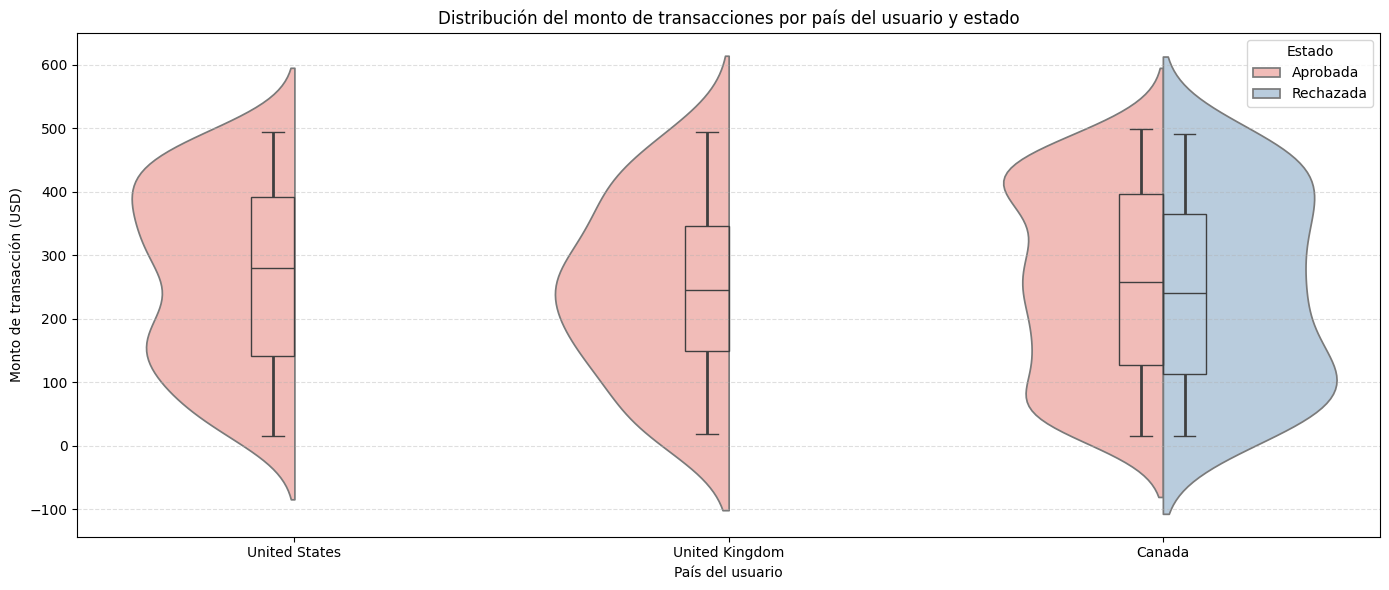

In [516]:
# 1. Preparamos el dataframe con país del usuario y estado de transacción
df_tran_user = df_transaction.merge(df_user[["user_id", "user_country"]], on="user_id")
df_tran_user["tran_status"] = df_tran_user["tran_decline"].map({False: "Aprobada", True: "Rechazada"})

# 2. Gráfico combinado
plt.figure(figsize=(14, 6))

# Violinplot por país del usuario y estado de la transacción
sns.violinplot(
    data=df_tran_user,
    x="user_country",
    y="tran_amount",
    hue="tran_status",
    split=True,
    palette="Pastel1",
    inner=None
)

sns.boxplot(
    data=df_tran_user,
    x="user_country",
    y="tran_amount",
    hue="tran_status",
    dodge=True,
    width=0.2,
    showcaps=True,
    boxprops={'facecolor':'None', "zorder": 10},
    showfliers=False,
    whiskerprops={'linewidth': 2},
)

# Ajustes del gráfico
plt.title("Distribución del monto de transacciones por país del usuario y estado")
plt.xlabel("País del usuario")
plt.ylabel("Monto de transacción (USD)")

# Limitar a una leyenda clara
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], labels[:2], title="Estado")

plt.grid(axis='y', linestyle='--', alpha=0.4)


plt.tight_layout()


Ejercicio 2
Genera un FacetGrid para visualizar múltiples aspectos de datos simultáneamente.

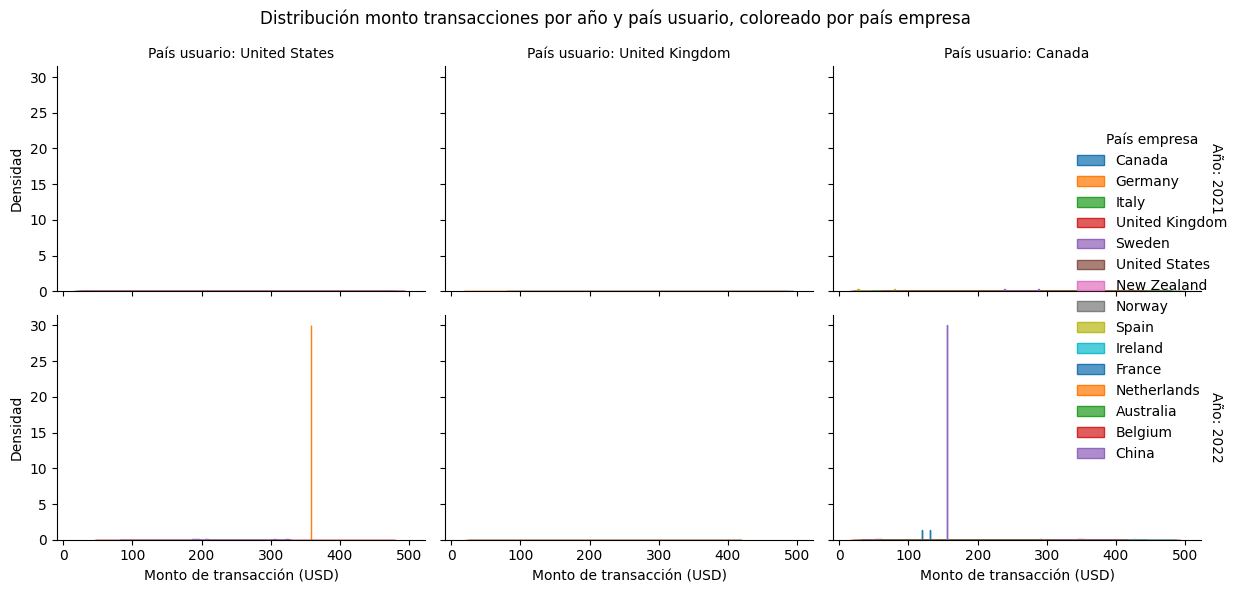

In [ ]:
# 1. Combinar los dataframes
df_tran_full = df_transaction.merge(df_company[["comp_id", "comp_country"]], on="comp_id") \
                             .merge(df_user[["user_id", "user_country"]], on="user_id")

# 2. Extraer año de la transacción
df_tran_full["tran_year"] = pd.to_datetime(df_tran_full["tran_timestamp"]).dt.year

# 3. Filtrar los años que quieres analizar
df_filtered = df_tran_full[df_tran_full["tran_year"].isin([2021, 2022])]

# 4. (Opcional) Limitar monto para evitar outliers extremos
df_filtered = df_filtered[df_filtered["tran_amount"] < 1000]

# 5. Crear FacetGrid: filas = año, columnas = país usuario, hue = país empresa
g = sns.FacetGrid(
    df_filtered,
    row="tran_year",
    col="user_country",
    hue="comp_country",
    margin_titles=True,
    height=3,
    aspect=1.2,
    palette="tab10",
    sharex=True,
    sharey=True
)

# 6. Mapear histograma en cada faceta
g.map(sns.histplot, "tran_amount", bins=30, element="step", stat="density", common_norm=False)

# 7. Ajustes visuales
g.set_axis_labels("Monto de transacción (USD)", "Densidad")
g.set_titles(row_template="Año: {row_name}", col_template="País usuario: {col_name}")
g.add_legend(title="País empresa")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribución monto transacciones por año y país usuario, coloreado por país empresa")

plt.tight_layout()
